In [27]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#identifying the image name
Col_frames = os.listdir('Images/')

#sort the images
Col_frames.sort(key=lambda f: int(re.sub('\D','',f)))
                   #pre defined parameters 
#import all images
Images = []

for i in Col_frames:
    Image = cv2.imread('Images/'+i)
    Images.append(Image)                   

In [29]:
kernel

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

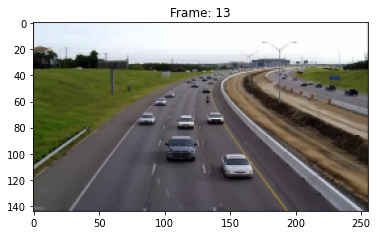

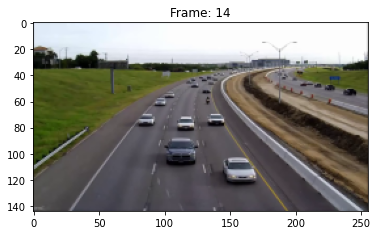

In [30]:
i = 13

for Index in [i,i+1]:
    plt.imshow(cv2.cvtColor(Images[Index],cv2.COLOR_BGR2RGB))
    plt.title("Frame: "+str(Index))
    plt.show()
   
                       

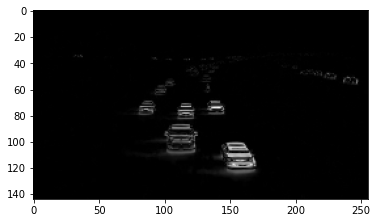

In [31]:
#convert to gray scale
GrayA = cv2.cvtColor(Images[i],cv2.COLOR_BGR2GRAY)
GrayB = cv2.cvtColor(Images[i+1],cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.absdiff(GrayB,GrayA),'gray')

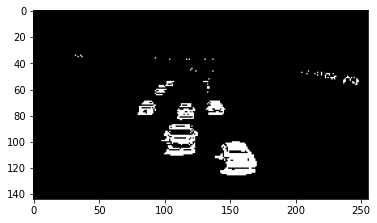

In [32]:
diff_image = cv2.absdiff(GrayB,GrayA)

#perform thresholding
ret, thresh = cv2.threshold(diff_image,19,20,cv2.THRESH_BINARY)

plt.imshow(thresh,'gray')

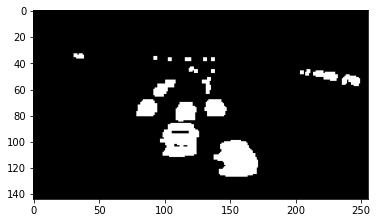

In [33]:
#image dilation 
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations=1)
plt.imshow(dilated,'gray')

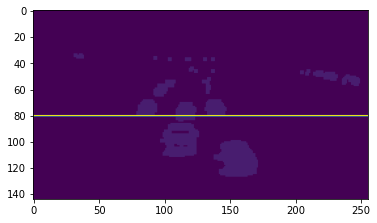

In [34]:
#creating a line
cv2.line(dilated,(0,80),(256,80),(255,0,0))
                 #x,y
plt.imshow(dilated)


In [35]:
valid_centers = [] #valid_centers are the number of contours which are being detected 
#find contours
contours, heirachy = cv2.findContours(dilated.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
                                                  #contour retrieval mode , contour approximation method 
for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)  #w=width  h=height
    if (x<=200) & (y>=80) & (cv2.contourArea(cntr)>=50):#contour_area(condition) the minimum area of the contour so that it should be considered as a car
        #specifying the bounding region
        valid_centers.append(cntr)
len(valid_centers)    

2

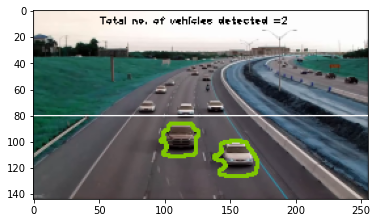

In [36]:
image_data = Images[13]

cv2.drawContours(image_data,valid_centers,-1,(127,200,0),2)
                                             #RGB value,thickness
cv2.line(image_data,(0,80),(256,80),(255,255,255))
image_data = cv2.putText(image_data,'Total no. of vehicles detected =' + str(len(valid_centers)),(50,10),cv2.FONT_HERSHEY_PLAIN,0.5,(0,0,0))
plt.imshow(image_data)

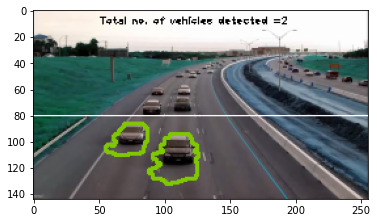

In [37]:
#identifying the images
Col_frames = os.listdir('Images/')

#sort the images
Col_frames.sort(key=lambda f: int(re.sub('\D','',f)))

#import all images
Images = []

for i in Col_frames:
    Image = cv2.imread('Images/'+i)
    Images.append(Image)
    
for i in range(0,len(Col_frames)-1):
    GrayA = cv2.cvtColor(Images[i],cv2.COLOR_BGR2GRAY)
    GrayB = cv2.cvtColor(Images[i+1],cv2.COLOR_BGR2GRAY)
    
    diff_image = cv2.absdiff(GrayB,GrayA)

    #perform thresholding
    ret, thresh = cv2.threshold(diff_image,19,20,cv2.THRESH_BINARY)

    kernel = np.ones((4,4),np.uint8)
    dilated = cv2.dilate(thresh,kernel,iterations=1)
    
    valid_centers = []
    #find contours
    contours, heirachy = cv2.findContours(dilated.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

    for j,cntr in enumerate(contours):
        x,y,w,h = cv2.boundingRect(cntr)  #w=width  h=height
        if (x<=200) & (y>=80) & (cv2.contourArea(cntr)>=50):
            valid_centers.append(cntr)
            
    image_data = Images[i]

    cv2.drawContours(image_data,valid_centers,-1,(127,200,0),2)
    cv2.line(image_data,(0,80),(256,80),(255,255,255))
    image_data = cv2.putText(image_data,'Total no. of vehicles detected =' + str(len(valid_centers)),(50,10),cv2.FONT_HERSHEY_PLAIN,0.5,(0,0,0))
    plt.imshow(image_data) 
    cv2.imwrite('data/'+str(i)+'.png',image_data)
    
    

        
     
    